# DiploDatos 2019 - Análisis de Series Temporales

## Integrantes

| Nombre | e-mail |
|------|------|
|Rivadero, Isabel | isarivadero@hotmail.com |
|Vargas, Miguel | lvc0107@protonmail.com |
|Mancuso, Fernando | manquius@gmail.com |



## Introducción
En este práctico se propone explorar un dataset que contiene información de varias agencias de correo de Brasil, con el objetivo de extraer toda la información relevante sobre estos datos y presentarla de manera organizada y sencilla.
En estos datos vamos a encontrar información geográfica de los compradores y vendedores, el tipo de servicio por el que viajan los paquetes, el estado del paquete, algunas fechas relevantes y la cantidad de días hábiles que tardó el envío en llegar a su destino (target).

## Dataset

## Definiciones

In [18]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set(rc={'figure.figsize':(10.5,8.5)})

cols = ['service',
        'sender_zipcode',
        'receiver_zipcode',
        'sender_state',
        'receiver_state',
        'shipment_type',
        'quantity',
        'status',
        'date_created',
        'date_sent',
        'date_visit',
        'target']
cols_holidays = ['holiday', 
                 'description']
data_path = './shipments_BR_201903.csv'
holidays = './holidays.csv'

### Datos
Los datos que vamos a cargar son un sample no uniforme que corresponde al mes de Marzo de 2019.

In [19]:
df = pd.read_csv(data_path, usecols=cols)
df.shape

(1000000, 12)

In [20]:
df.head()

,sender_state,sender_zipcode,receiver_state,receiver_zipcode,shipment_type,quantity,service,status,date_created,date_sent,date_visit,target
0,SP,3005,SP,5409,express,1,0,done,2019-03-04 00:00:00,2019-03-05 13:24:00,2019-03-07 18:01:00,2
1,SP,17052,MG,37750,standard,1,1,done,2019-03-19 00:00:00,2019-03-20 14:44:00,2019-03-27 10:21:00,5
2,SP,2033,SP,11040,express,1,0,done,2019-02-18 00:00:00,2019-02-21 15:08:00,2019-02-28 18:19:00,5
3,SP,13900,SP,18500,express,1,0,done,2019-03-09 00:00:00,2019-03-11 15:48:00,2019-03-12 13:33:00,1
4,SP,4361,RS,96810,express,1,0,done,2019-03-08 00:00:00,2019-03-12 08:19:00,2019-03-16 08:24:00,4


#### Referencia de las columnas
* **service**: Identificador unico que corresponde a un tipo de servicio de un correo en particular.
* **sender_zipcode:** Código postal de quien envía el paquete (usualmente el vendedor).
* **receiver_zipcode:** Código postal de quien recibe el paquete (usualmente el comprador).
* **sender_state:** Nombre abreviado del estado de quien envía el paquete.
* **receiver_state:** Nombre abreviado del estado de quien recibe el paquete.
* **quantity:** Cantidad de items que tiene dentro el paquete.
* **status:** Estado final del envío.
* **date_created:** Fecha de compra de el o los items.
* **date_sent:** Fecha en que el correo recibe el paquete.
* **date_visit:** Fecha en que el correo entrega el paquete.
* **target:** Cantidad de dias hábiles que tardó el correo en entregar el paquete desde que lo recibe.


#### Feriados

In [21]:
df_h = pd.read_csv(holidays, usecols=cols_holidays)
df_h.shape

(26, 2)

In [22]:
df_h.sample(5)

,holiday,description
0,2019-02-12,Carnaval
3,2019-03-31,Páscoa
23,2019-12-23,Noche buena
12,2019-05-12,Dia da Abolição da Escravatura
21,2019-02-11,Carnaval


# Información general

En general 
● Cantidad y proporción de envíos , servicios, tipos de envíos y rutas (consideramos 
como ruta la tripla zipcode, zipcode, servicio). 
● Puntos máximos y mínimos de cada feature.Calcular estadísticos como la media, mediana, desviación estándar y percentiles del target .
● Graficar la distribución del target ¿Responde a alguna distribución conocida?
● Graficar solo la parte más informativa de la distribución del target , teniendo cuidado
con elegir correctamente los parámetros de los gráficos, como la cantidad de bins en
un histograma.
● Identificar y graficar outliers. ¿Son significativos?
● ¿Los fines de semana son diferentes a los días de semana? ¿En qué sentido?
● ¿Existe algún periodo de tiempo diferente a los demás? Comparar gráficamente las
distribuciones de los targets (Puede ayudar utilizar información externa).
● Observando la distribución del target semana a semana. Explicar que sucede y cuál
puede ser la razón. Graficar las distribuciones en conjunto o la diferencia entre ellas.
● ¿Existen rutas más representadas que otras?
● La cantidad de items por paquete, ¿tiene relación con la velocidad del envío?
● ¿Existen variables correlacionadas?
● Graficar la distribución del target agrupando por tipo de envío.
● Determinar cuales son los servicios y los estados más representados


A efectos de overvar cuantos envios se realizaron o recibieron por dia, elimine la, hora, minutos y segundos de los datos 'date'  , me parece que no son datos relevantes y eliminarlos ayuda a plotear mejor por dia

In [23]:
data_sorted_by_date = df.sort_values(by=['date_sent']).copy()
data_sorted_by_date['date_sent'] = pd.to_datetime(data_sorted_by_date['date_sent']).dt.date
data_sorted_by_date['date_created'] = pd.to_datetime(data_sorted_by_date['date_created']).dt.date
data_sorted_by_date['date_visit'] = pd.to_datetime(data_sorted_by_date['date_visit']).dt.date

data_sorted_by_date.head()

,sender_state,sender_zipcode,receiver_state,receiver_zipcode,shipment_type,quantity,service,status,date_created,date_sent,date_visit,target
860785,SP,4905,PR,86450,standard,1,1,done,2018-09-30,2018-10-01,2019-03-22,118
416653,PE,50721,RJ,21730,standard,1,1,done,2018-11-11,2018-11-15,2019-03-25,86
213876,RJ,24720,ES,29304,standard,3,1,done,2018-11-11,2018-11-16,2019-02-28,69
334207,MG,31170,RJ,28621,standard,2,1,done,2018-11-16,2018-11-19,2019-03-14,77
845332,RJ,20910,PB,58780,standard,1,1,failed,2018-11-21,2018-11-22,2019-03-22,80


# cantidad de envios enviados por dia  para toda la poblacion de datos

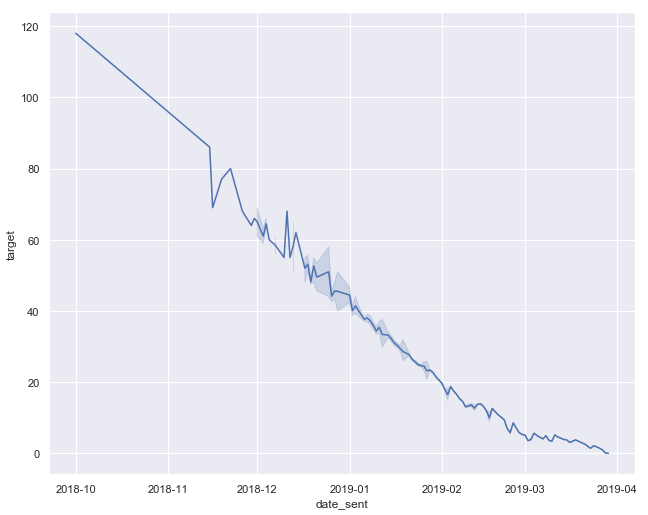

In [24]:
sb.lineplot(x='date_sent', y='target', data=data_sorted_by_date)

# cantidad de envios enviados por dia  para  una muestra, 

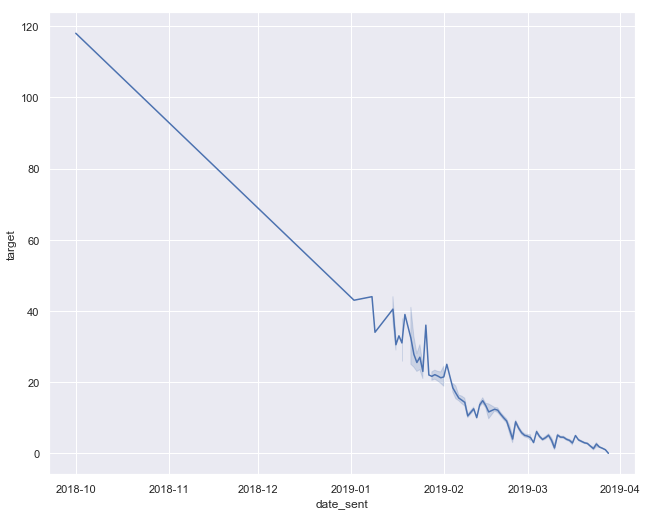

In [25]:
n = 10000
sb.lineplot(x='date_sent', y='target', data=data_sorted_by_date.sample(n=n))

Servicios
● Graficar solo la parte más informativa de la distribución del target para los 4
servicios más representados, con los cuidados correspondientes.
● ¿Existen servicios más rápidos que otros?
● ¿Existen servicios similares entre sí? ¿Alguna idea de porque?
● (Extra) ¿Podrías identificar cuántos correos aparecen en los datos?

In [ ]:
Estados
● Graficar solo la parte más informativa de la distribución del target para los 4 estados
más representados, con los cuidados correspondientes.
● ¿Cómo están distribuidos los vendedores geográficamente?
● ¿Cómo es la participación de los servicios dentro y fuera de San Pablo?
● (Extra) ¿Podrías explicar porque estos estados están más representados que los
otros?
● Realizar un mapa de calor utilizando los zipcodes de los vendedores y los
compradores.
● ¿Cual es la relación entre los zipcodes y los estados?

In [ ]:
Se espera que utilicen las preguntas como guía de lo que se espera que vean en los datos,
todas las respuestas tienen que estar justificadas con datos o gráficos. Se evaluará la
legibilidad del notebook, el detalle a la hora de responder las preguntas y mostrar la
información solicitada, y además que los gráficos utilizados sean apropiados y correctos. La
información no contemplada en las preguntas que se logre encontrar y presentar
correctamente será valorada.

# Conclusion